## **Computing correlation in R**

` for Parametric and Non-Parametric tests`

In [17]:
install.packages("ggpubr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘pbkrtest’, ‘lme4’, ‘car’, ‘rstatix’




In [18]:
library(ggpubr)

In [5]:
my_data = read.csv("/content/mtcars.csv")

In [6]:
head(my_data, 6)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1,Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
2,Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
3,Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
4,Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
5,Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
6,Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [7]:
str(my_data)

'data.frame':	32 obs. of  12 variables:
 $ model: chr  "Mazda RX4" "Mazda RX4 Wag" "Datsun 710" "Hornet 4 Drive" ...
 $ mpg  : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl  : int  6 6 4 6 8 6 8 4 4 6 ...
 $ disp : num  160 160 108 258 360 ...
 $ hp   : int  110 110 93 110 175 105 245 62 95 123 ...
 $ drat : num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt   : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec : num  16.5 17 18.6 19.4 17 ...
 $ vs   : int  0 0 1 1 0 1 0 1 1 1 ...
 $ am   : int  1 1 1 0 0 0 0 0 0 0 ...
 $ gear : int  4 4 4 3 3 3 3 4 4 4 ...
 $ carb : int  4 4 1 1 2 1 4 2 2 4 ...


Computing correlations between mpg and wt variables
1. We will start by vizualizing datapoints using the scatter plot.

In [8]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [15]:
library(ggplot2)

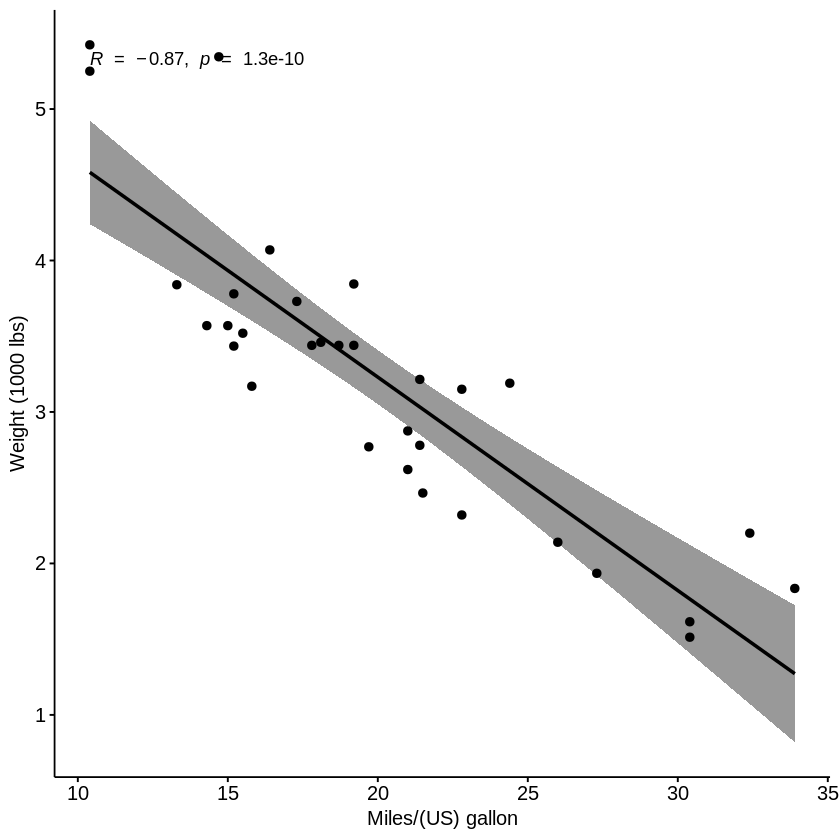

In [19]:
ggscatter(my_data, x = "mpg", y = "wt",
          add = "reg.line", conf.int = TRUE,
          cor.coef = TRUE, cor.method = "pearson",
          xlab = "Miles/(US) gallon",
          ylab = "Weight (1000 lbs)")

As we can see the "mpg" and "wt" are negatively correlated.

# Checking Normality
Let's now check the `normality` of the data to see if we can use the parametric test or non-parametric test.
- For this, we will be using `Shapiro-Wilk normality test` for 'mpg' and 'wt'

***The null hypothesis under Shapiro-Wilk Test:***

`H0 `: The data is normally distributed

In [20]:
shapiro.test(my_data$mpg)


	Shapiro-Wilk normality test

data:  my_data$mpg
W = 0.94756, p-value = 0.1229


Here, as we can see that the p-value is greater, we accept the H0 i.e., `the data is normally distributed`.


In [21]:
shapiro.test(my_data$wt)


	Shapiro-Wilk normality test

data:  my_data$wt
W = 0.94326, p-value = 0.09265


Here, as we can see that the p-value is greater, we accept the H0 i.e., `the data is normally distributed`.

### Now, as we saw that our data is normally distributed, we can use `Karl pearson correlation test`.

In [22]:
# karl-Pearson Correlation Test
result = cor.test(my_data$wt, my_data$mpg,
method = "pearson") # by default the method will be pearson
result


	Pearson's product-moment correlation

data:  my_data$wt and my_data$mpg
t = -9.559, df = 30, p-value = 1.294e-10
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9338264 -0.7440872
sample estimates:
       cor 
-0.8676594 


# **For non-normal data**

### Non-parametric Tests for Correlation


When data are in the form of ranks, we generally use `'Spearman rank correlation'`

In [25]:
# Spearman Rho
res2 = cor.test(my_data$wt, my_data$mpg, method = "spearman")
res2

Warning message in cor.test.default(my_data$wt, my_data$mpg, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  my_data$wt and my_data$mpg
S = 10292, p-value = 1.488e-11
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
-0.886422 


In [26]:
# Kendall's Tau
res3 = cor.test(my_data$wt, my_data$mpg, method = "kendall")
res3

Warning message in cor.test.default(my_data$wt, my_data$mpg, method = "kendall"):
“Cannot compute exact p-value with ties”



	Kendall's rank correlation tau

data:  my_data$wt and my_data$mpg
z = -5.7981, p-value = 6.706e-09
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
-0.7278321 


Here, we can see the `'warning message'` because the data is normal.

Therefore, we should be mindful of which correlation to use depending on the data.

---------

# **TASK 2**

### Testing mean

- Suppose that we want to know if the average weight of the mice differs from 25g

`H0: mu = 25`

`H1: mu != 25`

In [28]:
# Generating a random weight for the mice
set.seed(1234)

my_data = data.frame(
  name = paste0(rep("M_", 10), 1:10),
  weight = round(rnorm(10,20,2), 1)
)
# printing the data
my_data

name,weight
<chr>,<dbl>
M_1,17.6
M_2,20.6
M_3,22.2
M_4,15.3
M_5,20.9
M_6,21.0
M_7,18.9
M_8,18.9
M_9,18.9


In [31]:
#summary(my_data)

In [30]:
summary(my_data$weight)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.30   18.38   18.90   19.25   20.82   22.20 

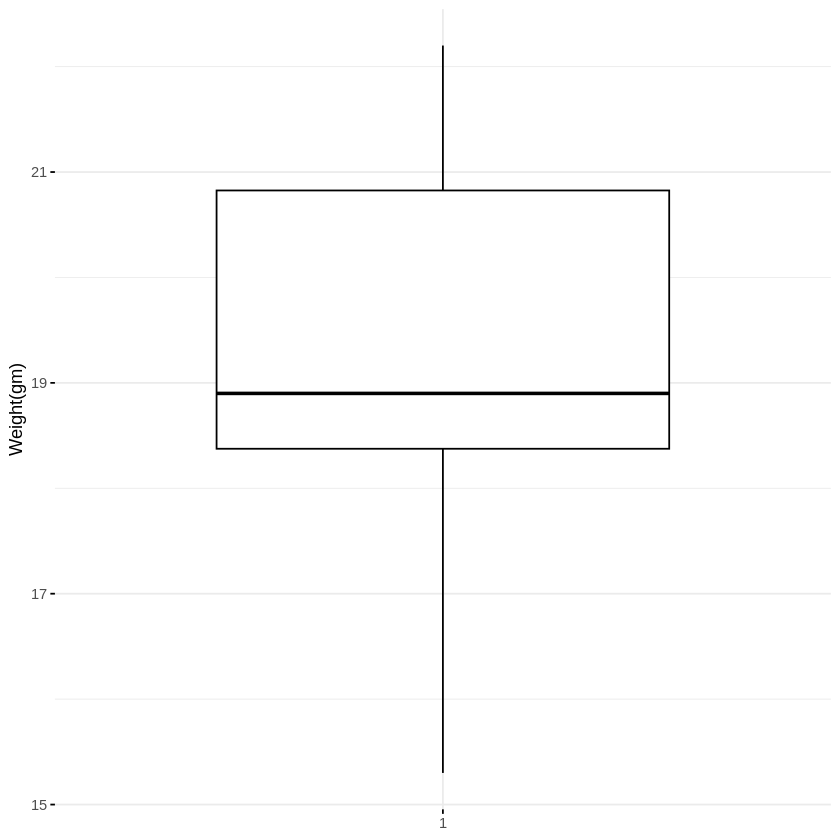

In [32]:
# library(ggpubr)
ggboxplot(my_data$weight,
ylab = "Weight(gm)",
xlab = FALSE,
ggtheme = theme_minimal())

Let's perform preliminary test to check on-sample t-test assumptions of `'Normality'`

In [33]:
# Shapiro-Wilk test
shapiro.test(my_data$weight)


	Shapiro-Wilk normality test

data:  my_data$weight
W = 0.9526, p-value = 0.6993


Here, as the p-value is greater we accept the H0 i.e., the data follows normal distribution.

Therefore, as the data is normal, we are going to use t- test.

In [34]:
# two-sided t-test
res = t.test(my_data$weight, mu = 25)
res


	One Sample t-test

data:  my_data$weight
t = -9.0783, df = 9, p-value = 7.953e-06
alternative hypothesis: true mean is not equal to 25
95 percent confidence interval:
 17.8172 20.6828
sample estimates:
mean of x 
    19.25 


Here, as the p-value is less, we reject the H0 and accept H1 i.e., `mu != 25`.

### Now, for one-sided(tail) test

`H0 : mu >= 25`

`H1 : mu < 25`

In [35]:
t.test(my_data$weight, mu = 25, alternative = 'less') # specifying the alternative hypothesis


	One Sample t-test

data:  my_data$weight
t = -9.0783, df = 9, p-value = 3.977e-06
alternative hypothesis: true mean is less than 25
95 percent confidence interval:
     -Inf 20.41105
sample estimates:
mean of x 
    19.25 


Here, as the p-value is less, we reject the H0 and accept H1 i.e., `mu < 25`.

--------

Similarly, for greater:

`H0 : mu <= 25`

`H1 : mu > 25`

In [37]:
t.test(my_data$weight, mu = 25, alternative = "greater")


	One Sample t-test

data:  my_data$weight
t = -9.0783, df = 9, p-value = 1
alternative hypothesis: true mean is greater than 25
95 percent confidence interval:
 18.08895      Inf
sample estimates:
mean of x 
    19.25 


Here, as the p-value is greater, we accept the H0 i.e., `mu <= 25`.

# Alternative of the **`t-test`** in non-parametric is **Wilcoxon Signed Rank Test**

------
Here, are assuming that our data was not normal.

In [38]:
# one-sample Wilcoxon Signed Rank Test
res = wilcox.test(my_data$weight, mu = 25)
res

Warning message in wilcox.test.default(my_data$weight, mu = 25):
“cannot compute exact p-value with ties”



	Wilcoxon signed rank test with continuity correction

data:  my_data$weight
V = 0, p-value = 0.005793
alternative hypothesis: true location is not equal to 25


Comparing the mean of two-independent groups:

`H0 : mean of two groups are equal`

`H1 : mean of two groups are not equal`

In [42]:
# data in two numeric vectors
women_weight = c(38.9, 61.2, 73.3, 21.8, 63.4, 64.6, 48.4, 48.5, 60.3)
men_weight = c(67.8, 60, 63.4, 76, 89.4, 73.3, 67.3, 61.3, 62.4)

In [43]:
my_data = data.frame(
  group = rep(c("Woman","Man"), each = 9),
  weight = c(women_weight, men_weight)
)
my_data

group,weight
<chr>,<dbl>
Woman,38.9
Woman,61.2
Woman,73.3
Woman,21.8
Woman,63.4
Woman,64.6
Woman,48.4
Woman,48.5
Woman,60.3


`Assumption1:` Are the two samples independent?
- Yes, since the samples are from men and women, they are not related. (If, it was related, we have to use `paired t-test`.)

`Assumption2:` Checking `Normality`?
- Shapiro-Wilk Normality test for Men's weights and Women's weights

In [47]:
# Shapiro-Wilk Normality test for Men's weights
with(my_data, shapiro.test(weight[group == "Man"]))


	Shapiro-Wilk normality test

data:  weight[group == "Man"]
W = 0.86425, p-value = 0.1066


In [50]:
# Shapiro-Wilk Normality test for Women's weights
with(my_data, shapiro.test(weight[group == "Woman"]))


	Shapiro-Wilk normality test

data:  weight[group == "Woman"]
W = 0.9229, p-value = 0.4168


Again, since our p-values are greater than 0.05 in both groups we accept the H0 i.e., The data in both the groups follow normal distribution.


------
------


`Assumption3 `: Do the two population have the same variences?

- We'll use F-test to test for homogeneity in variances.

`H0 : Ratio of variance is equal to 1`

`H1 : Ratio of variance not equal to 1`

In [51]:
res_ftest = var.test(weight ~ group, data = my_data)
res_ftest


	F test to compare two variances

data:  weight by group
F = 0.35377, num df = 8, denom df = 8, p-value = 0.163
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.07979847 1.56834266
sample estimates:
ratio of variances 
         0.3537674 


Again, we are accepting the null hypothesis of equality i.e., ratio of variance is equal to 1.

### Finally, as all our `3 assumptions` are clear. We can calculate our `t-test`.

In [52]:
# computing t-test
res = t.test(women_weight, men_weight, var.equal = TRUE)
res


	Two Sample t-test

data:  women_weight and men_weight
t = -2.5536, df = 16, p-value = 0.02125
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -28.57094  -2.65128
sample estimates:
mean of x mean of y 
 53.37778  68.98889 


Here, the p-value < 0.05, so, we will reject the hypothesis of equality (H0) and conculde that there is significance difference in the weights of men and women.

### To test whether the average men's weight is less than the average women's weight

In [54]:
# left-hand tailed test
t.test(women_weight, men_weight, var.equal = TRUE,
alternative = "less")


	Two Sample t-test

data:  women_weight and men_weight
t = -2.5536, df = 16, p-value = 0.01062
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf -4.937824
sample estimates:
mean of x mean of y 
 53.37778  68.98889 


# **Now:**
**Unpaired `Two-Samples Wilcoxon Test`**
- We want to know, if the median women's weight differs from the median men's weight.

In [55]:
res = wilcox.test(women_weight, men_weight)
res

Warning message in wilcox.test.default(women_weight, men_weight):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  women_weight and men_weight
W = 16, p-value = 0.03388
alternative hypothesis: true location shift is not equal to 0


## In the practical applications, we generally use the mean so Wilcoxon test is used mostly even though there are many other non-parametric tests.